# Probability Exercise

This notebook provides some exercises on basic probability concepts.

#### Written for the QuantEcon Africa Workshop (July 2023)
#### Author: [Smit Lunagariya](https://github.com/Smit-create)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1

**Question 1.1**: Consider you have $n$ cards numbered from $1$ to $n$. You need to complete following function that returns the probability of getting an odd-numbered card.

In [2]:
def odd_card_probability(n):
    possible_odds = n//2
    if n%2 == 1:
        possible_odds += 1
    return possible_odds/n

In [3]:
# Test the solution
try:
    assert abs(odd_card_probability(5) - 3/5) < 1e-12
    assert abs(odd_card_probability(240) - 1/2) < 1e-12
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


### Exercise 2

The **Newcomb–Benford law** fits  many data sets, e.g., reports of incomes to tax authorities, in which
the leading digit is more likely to be small than large.

See [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law)

A Benford probability distribution is

$$
\textrm{Prob}\{X=d\}=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left(1+\frac{1}{d}\right)
$$

where $ d\in\{1,2,\cdots,9\} $.

**Question 2.1**: Write a function that returns the probability at any given point $d$ using the Benford probability distribution.

In [4]:
def probability_benford(d):
    return np.log10(1 + 1/d)

In [5]:
# Test the solution
try:
    assert abs(probability_benford(2) - 0.17609125905568124) < 1e-12
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 2.2**: Using the above function, write a function that returns the sum of probabilities at all the points in the state space of Benford's distribution i.e $d \in \{1, 2, ... 9\}$. This fuction will help us to verify that the sum of probabilities sum to $1$.

$$
\quad\sum_{d=1}^{9}\textrm{Prob}\{X=d\}=1
$$

In [6]:
def test_probability_benford():
    return sum(probability_benford(d) for d in range(1, 10))

In [7]:
# Test the solution
try:
    assert abs(test_probability_benford() - 1.0) < 1e-12
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 2.3**: Using the above given probability distribution function, compute the cumulative density distribution. Also, plot the PMF and CDF in the same graph.

*Hint 1: If $ X $ ia a random variable then CDF $ F_X(x)=F(x)=\textrm{Prob}\{X\le x\} $.*

*Hint 2: See the documentation of [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)*

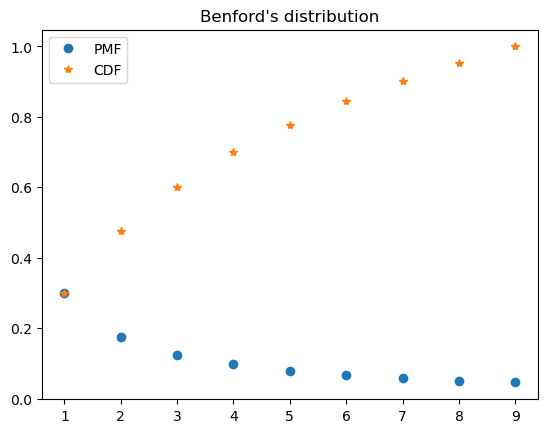

In [8]:
fig, ax = plt.subplots()

benford_pmf = np.array([probability_benford(d) for d in range(1,10)])
benford_cdf = np.cumsum(benford_pmf)

ax.plot(range(1,10), benford_pmf, 'o', label="PMF")
ax.plot(range(1,10), benford_cdf, '*', label="CDF")
plt.title('Benford\'s distribution')
plt.legend()
plt.show()

### Exercise 3

Consider the following joint distribution over $(X, Y)$ as:

$$
F=[f_{ij}]=\left[\begin{array}{cc}
0.2 & 0.15 & 0.15\\
0.1 & 0.15  & 0.05\\
0.025 & 0.025 & 0.15
\end{array}\right]
$$

In [9]:
F = np.array([
  [0.2, 0.15, 0.15],
  [0.1, 0.15, 0.05],
  [0.025, 0.025, 0.15]
])

**Question 3.1**: Write two functions that helps to calcuate the marginal distribution for $\textrm{Prob}(X=i)$ and $\textrm{Prob}(Y=j)$ respectively.

*Hint: See the documentation of [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html). Read about `axis` argument.*

In [10]:
def marginal_x(i):
    return F.sum(axis=1)[i]

def marginal_y(j):
    return F.sum(axis=0)[j]

In [11]:
# Test the solution
try:
    assert abs(marginal_x(0) - 0.5) < 1e-12
    assert abs(marginal_y(0) - 0.325) < 1e-12
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 3.2**: Using the above two functions, write two new functions for computing the conditional distribution of $\textrm{Prob}\{X=i\vert Y=j\}$ and $\textrm{Prob}\{Y=i\vert X=j\}$ respectively.




In [12]:
def conditional_x_given_y(i, j): # Prob {X = i | Y = j}
    return F[i][j]/marginal_y(j)

def conditional_y_given_x(i, j): # Prob {Y = i | X = j}
    return F[j][i]/marginal_x(j)

In [13]:
# Test the solution
try:
    assert abs(conditional_x_given_y(0, 1) - 0.4615384615384615) < 1e-12
    assert abs(conditional_y_given_x(2, 0) - 0.3) < 1e-12
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!
